In [1]:
def parab(a, b, c, x):
    return a * x**2 + b * x + c

In [2]:
def coeff(x, y):
    x1, x2, x3 = x
    y1, y2, y3 = y
    beh1 = x2 * y1 - x1 * y2
    beh2 = x2 - x1
    beh3 = y2 - y1
    a = (y3 - (x3 * beh3 + beh1) / beh2) / (x3 * (x3 - x1 - x2) + x1 * x2)
    b = beh3 / beh2 - a * (x1 + x2)
    c = beh1 / beh2 + a * x1 * x2
    return a, b, c

In [3]:
import numpy as np
x = np.linspace(0, 10, 20)

In [4]:
y = parab(1, 2, 3, x)
y_noise = y + np.random.normal(loc=0, scale=5, size=20)

In [5]:
x, y, y_noise

(array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
 array([  3.        ,   4.32963989,   6.2132964 ,   8.65096953,
         11.64265928,  15.18836565,  19.28808864,  23.94182825,
         29.14958449,  34.91135734,  41.22714681,  48.09695291,
         55.52077562,  63.49861496,  72.03047091,  81.11634349,
         90.75623269, 100.9501385 , 111.69806094, 123.        ]),
 array([  7.85759344,   3.54590133,  10.4189682 ,  10.44960362,
         10.27552151,  23.44592242,   8.4157575 ,  29.1521301 ,
         30.9163856 ,  42.08277134,  50.96787968,  47.48009732,
         58.05046607,  69.90089308,  73.89679989,  85.84245635,
         88.33848122, 101.07298554, 111.04663707, 121.51920339]))

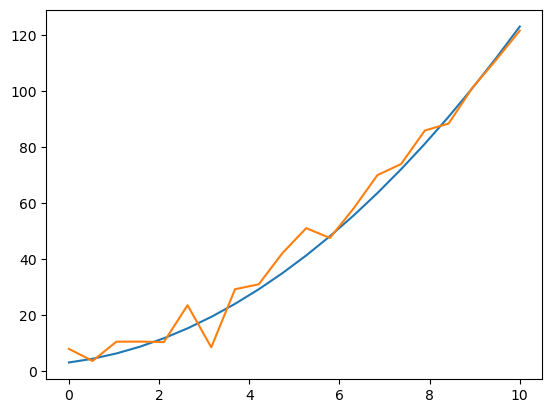

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.plot(x, y_noise)
plt.show()

In [7]:
t = []
for i in range(10):
    t.append(np.random.choice([i for i in range(20)], 3, replace=False))
t

[array([ 4, 15, 18]),
 array([11, 12,  4]),
 array([13, 16,  5]),
 array([6, 2, 8]),
 array([15,  6, 16]),
 array([9, 0, 7]),
 array([15, 19,  8]),
 array([ 1,  4, 19]),
 array([4, 9, 1]),
 array([ 7, 11,  6])]

In [8]:
t = [sorted(i) for i in t]

In [9]:
t

[[4, 15, 18],
 [4, 11, 12],
 [5, 13, 16],
 [2, 6, 8],
 [6, 15, 16],
 [0, 7, 9],
 [8, 15, 19],
 [1, 4, 19],
 [1, 4, 9],
 [6, 7, 11]]

In [10]:
for i in t:
    k = coeff(x[i], y_noise[i])
    print(k)

(0.3949526241993462, 9.1029443214348, -10.639054348197208)
(2.371512494618216, -8.624082198557433, 17.920625326384247)
(0.11125080772641152, 9.979100509864207, -3.585303348157434)
(7.070255228295522, -30.721020780741043, 34.92280699844375)
(-2.2046059420676873, 40.71233367701595, -98.16451673711143)
(1.3731011862120563, 0.7211518211112251, 7.857593441756303)
(0.3520095333666634, 10.647336881856274, -20.155118762230003)
(1.0374816572288197, 1.531877890234452, 2.4522587677726215)
(1.8583572631967213, -0.6283210728389728, 3.3618162259088002)
(-11.663462934602967, 119.20174907219791, -251.69927678525664)


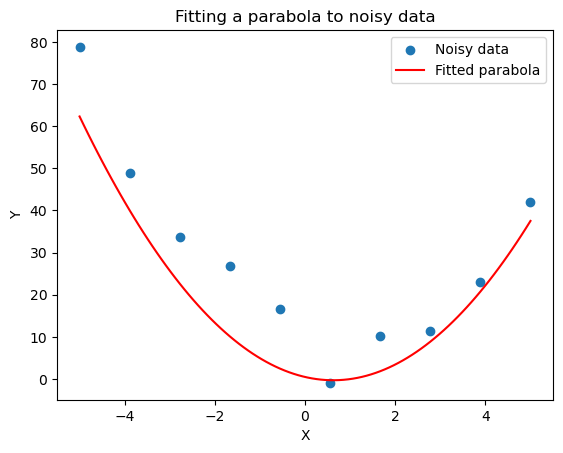

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some noisy data
np.random.seed(0)
x = np.linspace(-5, 5, 10)
y = 2 * x**2 - 3 * x + 5 + np.random.normal(0, 5, 10)  # Noisy parabola with coefficients [2, -3, 5]

# Define the cost function (mean squared error)
def cost_function(theta, x, y):
    m = len(y)
    predictions = theta[0] + theta[1] * x + theta[2] * x**2
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Define the gradient of the cost function
def gradient(theta, x, y):
    m = len(y)
    grad = np.zeros(3)
    predictions = theta[0] + theta[1] * x + theta[2] * x**2
    grad[0] = (1/m) * np.sum(predictions - y)
    grad[1] = (1/m) * np.sum((predictions - y) * x)
    grad[2] = (1/m) * np.sum((predictions - y) * x**2)
    return grad

# Gradient Descent function
def gradient_descent(x, y, learning_rate=0.01, iterations=10):
    theta = np.zeros(3)  # Initialize parameters
    costs = []
    for i in range(iterations):
        theta -= learning_rate * gradient(theta, x, y)
        costs.append(cost_function(theta, x, y))
    return theta, costs

# Run gradient descent
theta, costs = gradient_descent(x, y)

# Plot the original data
plt.scatter(x, y, label='Noisy data')

# Plot the fitted parabola
x_fit = np.linspace(-5, 5, 100)
y_fit = theta[0] + theta[1] * x_fit + theta[2] * x_fit**2
plt.plot(x_fit, y_fit, color='red', label='Fitted parabola')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a parabola to noisy data')
plt.legend()
plt.show()


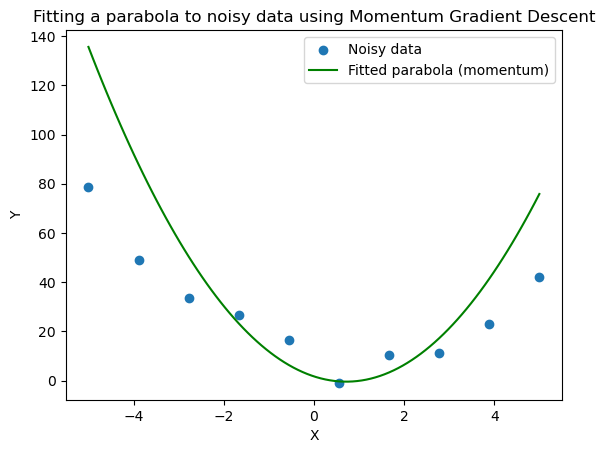

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some noisy data
np.random.seed(0)
x = np.linspace(-5, 5, 10)
y = 2 * x**2 - 3 * x + 5 + np.random.normal(0, 5, 10)  # Noisy parabola with coefficients [2, -3, 5]

# Define the cost function (mean squared error)
def cost_function(theta, x, y):
    m = len(y)
    predictions = theta[0] + theta[1] * x + theta[2] * x**2
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Define the gradient of the cost function
def gradient(theta, x, y):
    m = len(y)
    grad = np.zeros(3)
    predictions = theta[0] + theta[1] * x + theta[2] * x**2
    grad[0] = (1/m) * np.sum(predictions - y)
    grad[1] = (1/m) * np.sum((predictions - y) * x)
    grad[2] = (1/m) * np.sum((predictions - y) * x**2)
    return grad

# Momentum Gradient Descent function
def momentum_gradient_descent(x, y, learning_rate=0.01, momentum=0.9, iterations=10):
    theta = np.zeros(3)  # Initialize parameters
    v = np.zeros(3)  # Initialize velocity
    costs = []
    for i in range(iterations):
        grad = gradient(theta, x, y)
        v = momentum * v - learning_rate * grad
        theta += v
        costs.append(cost_function(theta, x, y))
    return theta, costs

# Run momentum gradient descent
theta_momentum, costs_momentum = momentum_gradient_descent(x, y)

# Plot the original data
plt.scatter(x, y, label='Noisy data')

# Plot the fitted parabola
x_fit = np.linspace(-5, 5, 100)
y_fit_momentum = theta_momentum[0] + theta_momentum[1] * x_fit + theta_momentum[2] * x_fit**2
plt.plot(x_fit, y_fit_momentum, color='green', label='Fitted parabola (momentum)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a parabola to noisy data using Momentum Gradient Descent')
plt.legend()
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Function to generate noisy data for a parabola
def generate_data(coefficients, noise_level, num_points):
    x = np.linspace(-5, 5, num_points)
    y = coefficients[0] * x**2 + coefficients[1] * x + coefficients[2] + np.random.normal(0, noise_level, num_points)
    return x, y

# Generate different data for training
np.random.seed(0)
num_points = 100
num_samples = 500
data = []
for _ in range(num_samples):
    coefficients = np.random.uniform(-5, 5, size=3)  # Random coefficients for the parabola
    noise_level = np.random.uniform(0, 10)  # Random noise level
    x, y = generate_data(coefficients, noise_level, num_points)
    data.append((x, y, coefficients))

# Convert data to PyTorch tensors
x_tensors = []
y_tensors = []
for x, y, _ in data:
    x_tensors.append(torch.tensor(x, dtype=torch.float32).view(-1, 1))
    y_tensors.append(torch.tensor(y, dtype=torch.float32).view(-1, 1))

# Concatenate x and y tensors as input
xy_tensors = [torch.cat((x, y), 1) for x, y, _ in data]

# Define the neural network model
class ParabolaNet(nn.Module):
    def __init__(self):
        super(ParabolaNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # Input layer (2 neurons: x and y)
        self.fc2 = nn.Linear(10, 20)  # Hidden layer with 20 neurons
        self.fc3 = nn.Linear(20, 3)  # Output layer (3 neurons: coefficients of parabola)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))  # ReLU activation for input layer
        x = self.relu(self.fc2(x))  # ReLU activation for hidden layer
        x = self.fc3(x)
        return x

# Instantiate the model
model = ParabolaNet()

# Define the loss function (mean squared error)
criterion = nn.MSELoss()

# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    total_loss = 0
    for xy_tensor, coefficients in zip(xy_tensors, [coefficients for _, _, coefficients in data]):
        optimizer.zero_grad()
        outputs = model(xy_tensor)
        loss = criterion(outputs, torch.tensor([coefficients], dtype=torch.float32))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/num_samples:.4f}')

# Print the predicted coefficients for one sample
with torch.no_grad():
    sample_idx = 0
    predicted_coefficients = model(xy_tensors[sample_idx]).numpy()
    true_coefficients = data[sample_idx][2]
    print("True coefficients:", true_coefficients)
    print("Predicted coefficients:", predicted_coefficients)

# Plot the original data and the fitted parabola for one sample
x_sample, y_sample, _ = data[sample_idx]
plt.scatter(x_sample, y_sample, label='Noisy data')
a, b, c = predicted_coefficients[0]
y_pred = a * x_sample**2 + b * x_sample + c
plt.plot(x_sample, y_pred, color='red', label='Fitted parabola (NN)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a parabola to noisy data using Neural Network (PyTorch)')
plt.legend()
plt.show()


TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [ ]:
x = np.linspace(-5, 5, 10)
y = 2 * x**2 - 3 * x + 5 + np.random.normal(0, 5, 10)
